_Run the cell below to **import** pandas and to visualize matplotlib into the notebook_

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

### Working with time series data

The goal of these exercises is to feel confortable working with time series and pandas library.  

The choosen Dataset is from AirBase, the European Air Quality Database:
* **hourly measurements** of all air quality monitoring stations from Europe

Run the code cell below to import data and ensure that has a `DatetimeIndex` so that time-related functionalities become available.

In [5]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)
print(no2.index)
no2.head(5)

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=149039, freq=None)


,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


<div class="alert alert-warning">

<b>Indexing a time series works with strings or *partial strings*</b>:

</div>


In [6]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2010-01-01 09:00:00,31.0,27.0,28.0,14.0
2010-01-01 10:00:00,41.0,31.0,30.0,14.0
2010-01-01 11:00:00,48.0,32.0,33.0,16.0
2010-01-01 12:00:00,63.0,33.0,39.0,19.0


In [7]:
no2['2012-01':'2012-03']

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,46.0,34.0,22.0,8.0
...,...,...,...,...
2012-03-31 20:00:00,61.0,55.0,29.0,17.0
2012-03-31 21:00:00,46.0,49.0,32.0,14.0
2012-03-31 22:00:00,56.0,41.0,27.0,14.0
2012-03-31 23:00:00,59.0,51.0,29.0,13.0


<div class="alert alert-warning">

<b>Time and date components can be accessed from the index:</b>:

</div>

In [8]:
no2.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=149039)

In [9]:
no2.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='timestamp', length=149039)

<div class="alert alert-warning">

<b>Converting the frequency of the time series, e.g. from hourly to daily data</b>:
 <ul>
    <li>A very powerfull method is `resample` .</li>
 </ul>
</div>

### The time series has a frequency of 1 **hour**. I want to change this **to daily**:

In [10]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [22]:
no2.resample('D').max().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,109.0,62.0,77.0,59.0
2000-01-02,109.0,96.0,78.0,45.0
2000-01-03,120.0,102.0,72.0,37.0
2000-01-04,115.0,107.0,78.0,43.0
2000-01-05,141.0,115.0,82.0,41.0


In [11]:
no2.resample('D').mean().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,83.173913,53.772727,64.695652,36.521739
2000-01-02,78.708333,59.250000,63.708333,17.166667
2000-01-03,82.333333,73.541667,61.000000,23.083333
2000-01-04,78.500000,73.708333,48.863636,23.791667
2000-01-05,94.291667,90.458333,60.166667,28.214286


### Very useful practice also in plotting data

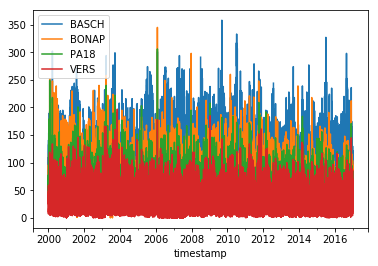

In [12]:
no2.plot()

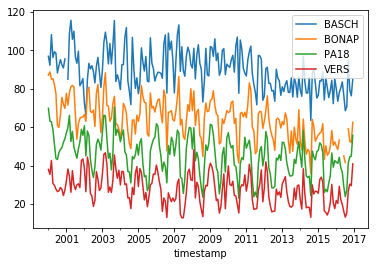

In [13]:
no2.resample('M').mean().plot() # 'A'

<div class="alert alert-warning">

<b>These strings can also be combined with numbers, eg `'10D'`.</b>:
 <ul>
    <li>The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  </li>
 </ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>: The evolution of the yearly averages with, and the overall mean of all stations

 <ul>
  <li>Use `resample` and `plot` to plot the yearly averages for the different stations.</li>
</ul>
</div>

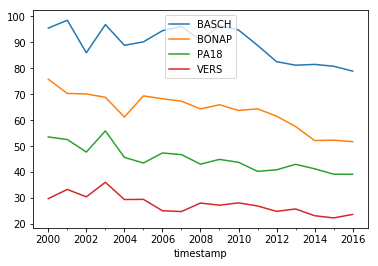

In [14]:
no2.resample('Y').mean().plot()

<div class="alert alert-success">

<b>EXERCISE</b>: how does the *typical monthly profile* look like for the different stations?

 <ul>
  <li>Add a 'month' column to the dataframe.</li>
  <li>Group by the month to obtain the typical monthly averages over the different years.</li>
</ul>
</div>

First, we add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [15]:
no2['month'] = no2.index.month
no2['month']

timestamp
2000-01-01 01:00:00     1
2000-01-01 02:00:00     1
2000-01-01 03:00:00     1
2000-01-01 04:00:00     1
                       ..
2016-12-31 20:00:00    12
2016-12-31 21:00:00    12
2016-12-31 22:00:00    12
2016-12-31 23:00:00    12
Name: month, Length: 149039, dtype: int64

Now, we can calculate the mean of each month over the different years:

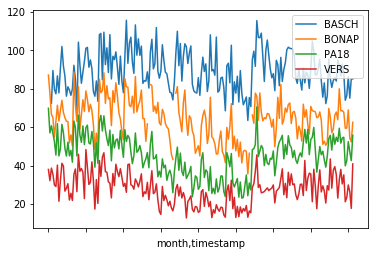

In [52]:
no2.groupby('month')['BASCH', 'BONAP', 'PA18', 'VERS'].resample('Y').mean().plot()

<div class="alert alert-success">

<b>EXERCISE</b>: The typical diurnal profile for the different stations

 <ul>
  <li>Similar as for the month, you can now group by the hour of the day.</li>
</ul>
</div>

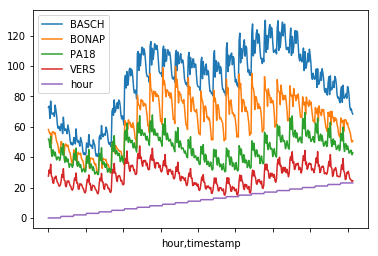

In [66]:
no2['hour'] = no2.index.hour
no2.groupby('hour')['BASCH', 'BONAP', 'PA18', 'VERS','hour'].resample('Y').mean().plot()

<div class="alert alert-success">

<b>EXERCISE</b>: What is the difference in the typical diurnal profile between week and weekend days for the 'BASCH' station.

 <ul>
  <li>Add a column 'weekday' defining the different days in the week.</li>
  <li>Add a column 'weekend' defining if a days is in the weekend (i.e. days 5 and 6) or not (True/False).</li>
  <li>You can groupby on multiple items at the same time. In this case you would need to group by both weekend/weekday and hour of the day.</li>
</ul>
</div>

Add a column indicating the weekday:

In [30]:
no2['weekday'] = no2.index.weekday
no2['weekday']

timestamp
2000-01-01 01:00:00    5
2000-01-01 02:00:00    5
2000-01-01 03:00:00    5
2000-01-01 04:00:00    5
                      ..
2016-12-31 20:00:00    5
2016-12-31 21:00:00    5
2016-12-31 22:00:00    5
2016-12-31 23:00:00    5
Name: weekday, Length: 149039, dtype: int64

Add a column indicating week/weekend

In [40]:
no2['weekend'] = no2['weekday'] >= 5
no2['weekend']

timestamp
2000-01-01 01:00:00    True
2000-01-01 02:00:00    True
2000-01-01 03:00:00    True
2000-01-01 04:00:00    True
                       ... 
2016-12-31 20:00:00    True
2016-12-31 21:00:00    True
2016-12-31 22:00:00    True
2016-12-31 23:00:00    True
Name: weekend, Length: 149039, dtype: bool

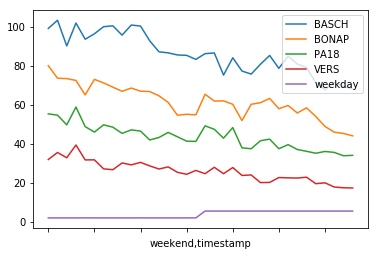

In [61]:
no2.groupby(['weekend'])['BASCH', 'BONAP', 'PA18', 'VERS', 'weekday'].resample('Y').mean().plot()

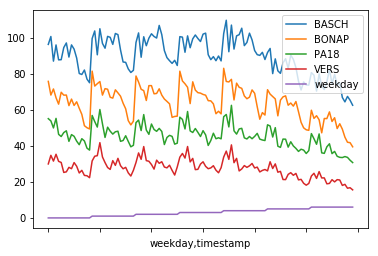

In [63]:
no2.groupby(['weekday'])['BASCH', 'BONAP', 'PA18', 'VERS', 'weekday'].resample('Y').mean().plot()

Now we can groupby the hour of the day and the weekend:

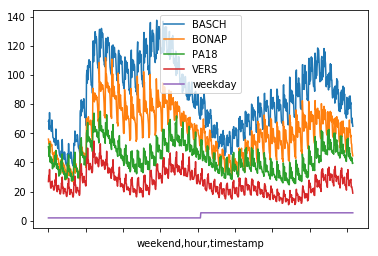

In [69]:
no2.groupby(['weekend','hour'])['BASCH', 'BONAP', 'PA18', 'VERS', 'weekday'].resample('Y').mean().plot()

In [72]:
no2.groupby(['weekend','hour'])['BASCH', 'BONAP', 'PA18', 'VERS', 'weekday'].resample('Ydd').mean()


BASCH      BONAP       PA18       VERS   weekday
weekend hour timestamp                                                       
False   0    2000-12-31  68.248945  56.011765  50.734615  26.888412  2.000000
             2001-12-31  69.021858  54.087500  48.795455  31.124031  1.992337
             2002-12-31  62.672065  52.635294  44.000000  28.848249  1.996169
             2003-12-31  74.214876  53.552036  53.016667  35.178988  2.000000
...                            ...        ...        ...        ...       ...
True    23   2013-12-31  67.284314  52.583333  42.120000  23.514563  5.500000
             2014-12-31  70.432692  47.840000  43.105769  22.213592  5.500000
             2015-12-31  66.903846  46.105769  39.313725  21.070000  5.500000
             2016-12-31  64.838095  44.577465  39.568627  18.960396  5.495238

[816 rows x 5 columns]

<div class="alert alert-success">

<b>EXERCISE</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?

Count the number of exceedances of hourly values above the European limit 200 µg/m3 for each year and station after 2005. Make a barplot of the counts. Add an horizontal line indicating the maximum number of exceedances (which is 18) allowed per year?
<br><br>

Hints:

 <ul>
  <li>Create a new DataFrame, called `exceedances`, (with boolean values) indicating if the threshold is exceeded or not</li>
  <li>Remember that the sum of True values can be used to count elements. Do this using groupby for each year.</li>
  <li>Adding a horizontal line can be done with the matplotlib function `ax.axhline`.</li>
</ul>
</div>

In [77]:
no2['year'] = no2.index.year

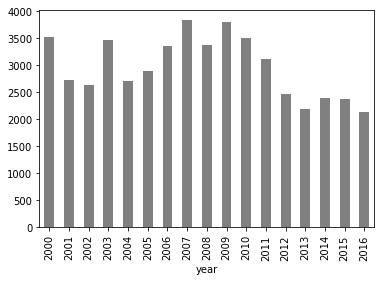

In [110]:
no2['BASCH_exceed'] = no2['BASCH'] > 100
no2.groupby('year')['BASCH_exceed'].sum().plot(kind='bar', color='grey')

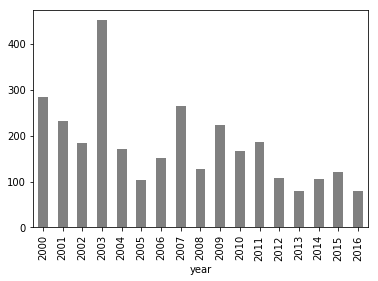

In [111]:
no2['PA18_exceed'] = no2['PA18'] > 100
no2.groupby('year')['PA18_exceed'].sum().plot(kind='bar',color='grey')

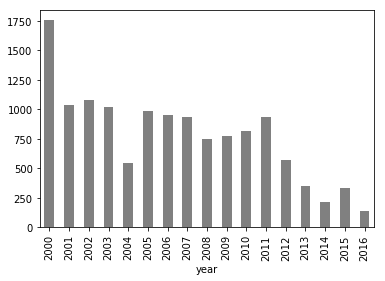

In [112]:
no2['BONAP_exceed'] = no2['BONAP'] > 100
no2.groupby('year')['BONAP_exceed'].sum().plot(kind='bar',color='grey')

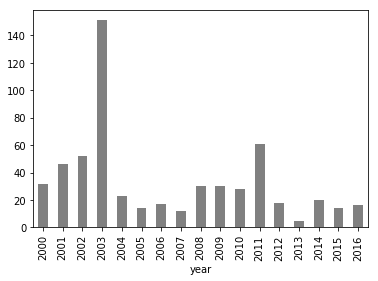

In [113]:
no2['VERS_exceed'] = no2['VERS'] > 100
no2.groupby('year')['VERS_exceed'].sum().plot(kind='bar',color='grey')